This notebook provides an introduction to machine learning and walks through how to develop workflows for training machine learning models.

This lesson is prepared by:
- [Daniel Marrable](http://computation.curtin.edu.au/about/computational-specialists/curtin-business-school/)
- [Kevin Chai](http://computation.curtin.edu.au/about/computational-specialists/health-sciences/)
- [Rebecca Lange](http://computation.curtin.edu.au/about/computational-specialists/humanities/)

from the [Curtin Institute for Computation](http://computation.curtin.edu.au) at Curtin University in Perth, Australia. 

Some of the materials in this notebook have been referenced and adapted from:


Make sure to open this notebook in the root directory of the code repository.

This work is made available under the [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

1. [Introduction](#1.-Introduction)
2. [Recap](#2.-Recap)
3. [Nueral Networks](#3.-Nueral Networks)


[[ go back to the top ]](#Table-of-contents)

This notebook uses several Python packages that come standard with the [Anaconda Python distribution](http://continuum.io/downloads). The primary libraries that we'll be using are:

* **NumPy**: a fast numerical array structure and helper functions.
* **pandas**: a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: a machine learning package.
* **matplotlib**: a basic plotting library; most other plotting libraries are built on top of it.
* **seaborn**: a advanced statistical plotting library.
* **keras**: a high level abstraction library for machine learning backends like theano and tensorflow.

To make sure you have all of the packages you need, install them with `conda`:

    conda install numpy pandas scikit-learn matplotlib seaborn keras

`conda` may ask you to update some of the packages if you don't have the most recent version. Allow it to do so.

Alternatively, if you can install the packages with [pip](https://pip.pypa.io/en/stable/installing/) (a Python package manager):

    pip install numpy pandas scikit-learn matplotlib seaborn keras


## Recap

## Nueral Networks

In [1]:
import numpy as np
import pylab
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


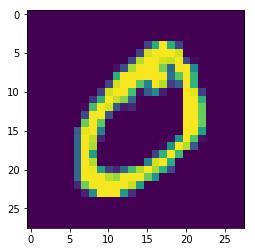

In [3]:
pylab.imshow(x_train[1])

In [4]:
x_train[0].flatten().shape

(784,)

In [5]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')



In [6]:
x_train = x_train / 255
x_test = x_test / 255

### Create a simple single layer perceptron

In [7]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=784))
model.add(Dense(units=10, activation='softmax'))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


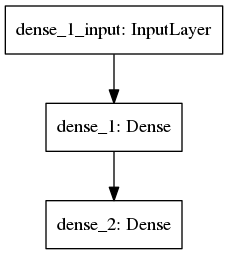

In [9]:
from keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='model.png')

Image("model.png")

### Complile the model
Once that we are happy with our model archetecture, we compile the model


In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Explain the loss, optimizer and metrics.  What are they ??

In [11]:
import keras.utils

In [12]:
# one hot encode outputs
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
num_classes = y_test.shape

In [13]:
print(x_train.shape)
print(y_train.shape)


(60000, 784)
(60000, 10)


In [37]:
print(x_test.shape)
print(y_test.shape)

(10000, 784)
(10000, 10)


### Start training the model

In [15]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 106us/step - loss: 0.2596 - acc: 0.9260 - val_loss: 0.1427 - val_acc: 0.9565
Epoch 2/5
60000/60000 [==============================] - 6s 108us/step - loss: 0.1153 - acc: 0.9658 - val_loss: 0.0967 - val_acc: 0.9710
Epoch 3/5
60000/60000 [==============================] - 6s 105us/step - loss: 0.0788 - acc: 0.9762 - val_loss: 0.0884 - val_acc: 0.9731
Epoch 4/5
60000/60000 [==============================] - 6s 108us/step - loss: 0.0580 - acc: 0.9819 - val_loss: 0.0789 - val_acc: 0.9758
Epoch 5/5
60000/60000 [==============================] - 6s 106us/step - loss: 0.0458 - acc: 0.9861 - val_loss: 0.0765 - val_acc: 0.9762


In [38]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 2.38%


In [72]:
x_test[0:1].shape

(1, 784)

In [65]:
y_test[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [80]:
classes = model.predict(x_test[0:1])

In [81]:
np.argmax(classes)

7

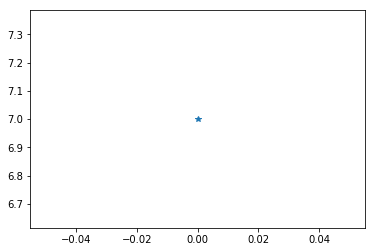

In [82]:
pylab.plot(np.argmax(classes), '*')

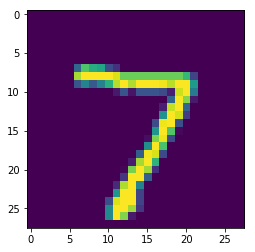

In [19]:
pylab.imshow(x_test[0].reshape(28, 28))

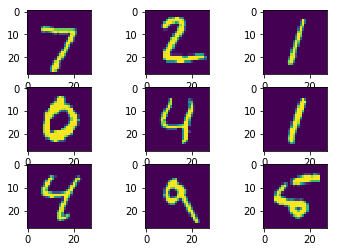

In [32]:
for i in range(0, 9):
    pylab.subplot(330 + 1 + i)
    pylab.imshow(x_test[i].reshape(28, 28))
# show the plot
pylab.show()